In [3]:
#Example modified from http://cs231n.github.io/neural-networks-case-study/

#Imports 
import numpy as np #Represent ndarrays a.k.a. tensors
import matplotlib.pyplot as plt #For plotting
np.random.seed(0) #For repeatability of the experiment
import pickle #To read data for this experiment

#Setup
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

**Data**

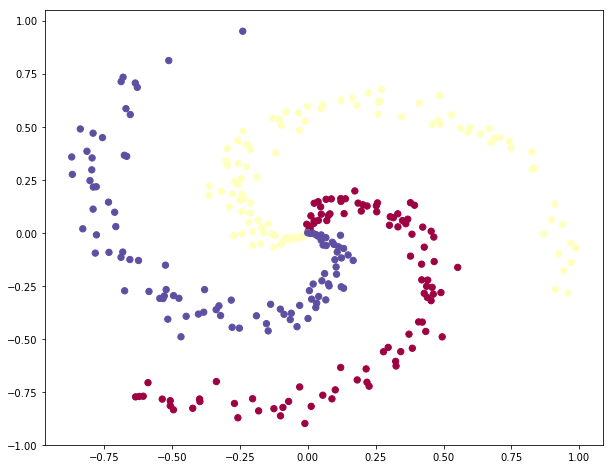

In [4]:

#Read data
X = pickle.load(open('dataX.pickle','rb'))
y = pickle.load(open('dataY.pickle','rb'))

#Define some local varaibles
D = X.shape[1] #Number of features
K = max(y)+1 #Number of classes assuming class index starts from 0

#Plot the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

**Model**

In [5]:
# Feedforward neural net model


# Start with an initial set of parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))



# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#For simplicity, we will not optimize this using grid search here.

In [9]:
#Perform batch SGD using manual backprop


#For simplicity we will take the batch size to be the same as number of examples
num_examples = X.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.


# gradient descent loop
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print("iteration {0}: loss {1}".format(i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 0.24148216000469605
iteration 1000: loss 0.24139324319626088
iteration 2000: loss 0.24131346994697214
iteration 3000: loss 0.24121517961444128
iteration 4000: loss 0.24115973223687723
iteration 5000: loss 0.2411333657285833
iteration 6000: loss 0.24110924788362392
iteration 7000: loss 0.24109058002951944
iteration 8000: loss 0.24107791399078488
iteration 9000: loss 0.2410749409307743


**Post Training**

In [10]:
# Post-training: evaluate test set accuracy

#For simplicity, we will use training data as proxy for test. Do not do this.
X_test = X
y_test = y


hidden_layer = np.maximum(0, np.dot(X_test, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('test accuracy: {0}'.format(np.mean(predicted_class == y_test)))

test accuracy: 0.99


(-1.89892927338289, 1.9410707266171134)

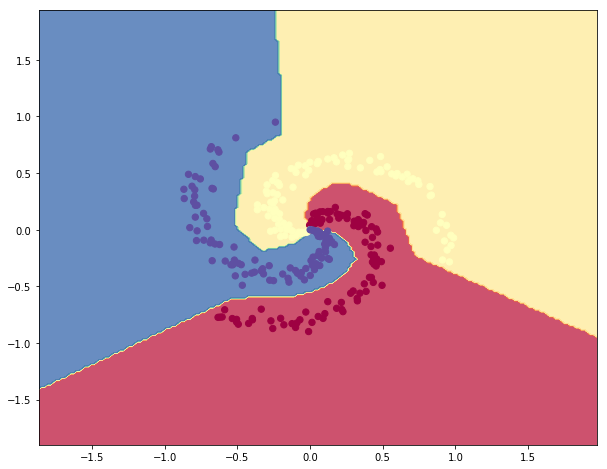

In [11]:
# Post training: plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())